In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/Users/hongyuyuan/opt/anaconda3/envs/python391/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


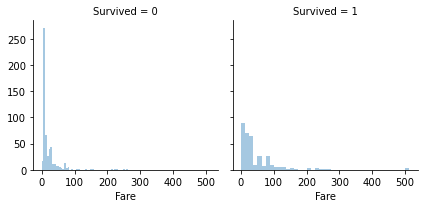

In [8]:
# Q1:觀察票價是否有異常值的現象?
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [7]:
# 方法一 用敘述性統計觀察
df_train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
# 方法二 -> 三倍標準差
def outlier_z_score(data,times):
    mean=np.mean(data)
    std=np.std(data)
    zscore=[((i-mean)/std) for i in data]
    return np.where(np.abs(zscore) > times)

out_index=outlier_z_score(df_train["Fare"],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index,"Fare"])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [21]:
# 方法二 -> 盒鬚圖判別法(IQR method)
def outlier_iqr(data,times):
    quantile_1,quantile_3=np.nanquantile(data,[0.25,0.75])
    iqr=quantile_3-quantile_1
    lower_bound=quantile_1-(iqr*times)
    upper_bound=quantile_3+(iqr*times)
    return np.where((data <lower_bound )|(data>upper_bound))

out_index2=outlier_iqr(df_train['Fare'],1.5)
print(out_index2[0])
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])

[  1  27  31  34  52  61  62  72  88 102 118 120 124 139 151 159 180 195
 201 215 218 224 230 245 256 257 258 262 268 269 275 290 291 297 299 305
 306 307 310 311 318 319 324 325 332 334 336 337 341 366 369 373 375 377
 380 385 390 393 412 435 438 445 453 484 486 496 498 504 505 520 527 537
 540 544 550 557 558 581 585 587 591 609 627 641 645 655 659 660 665 679
 681 689 698 700 708 716 730 737 741 742 745 759 763 765 779 789 792 802
 820 829 835 846 849 856 863 879]
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


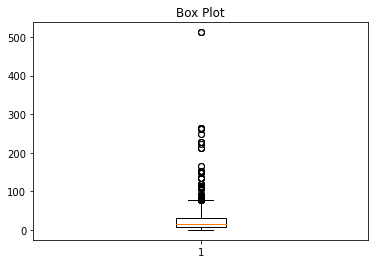

In [22]:
# 方法三
# 使用np.isnana(data)，找出在 Fare 中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=2)    #作圖
plt.title('Box Plot')
plt.show()